In [6]:
import os , os.path #osを読み込む
import sys
import pandas as pd #xlsxのファイルをcsvにする
import ast
import requests
from bs4 import BeautifulSoup
import json
from urllib import request
import csv
import collections
import glob
import re
import copy
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
#評価ワード読み込み
df1 = pd.read_excel("評価ワード.xlsx", sheet_name=0)
df1.to_csv("評価ワード.csv", index=False, header=None, encoding='utf_8_sig')
with open("評価ワード.csv", encoding='utf_8_sig') as fp:
    
    #tuple型の評価ワード作成
    all_list = [] #all_lstはtuple型の評価ワード全部
    reader = csv.reader(fp)
    for row in reader: #rowはキヤノンらしいのかたまり
        word_list = [] #elementを追加していったもの
        for element in row: #elementはキヤノンらしいなどの単語1つ1つ
            if element != '': #空白削除
                word_list.append(element) #word_lstに追加していく
                word_tuple = tuple(word_list) #word_tupleはword_lstをタプル型に変換
        #print(word_tuple[0])
        all_list.append(word_tuple) #all_lstに追加していく
    #print(all_list[0])

In [8]:
#評価表現辞書読み込み
df2 = pd.read_excel("評価表現辞書.xlsx", sheet_name=0)
df2.to_csv("評価表現辞書.csv", index=False, header=None, encoding='utf_8_sig')
with open("評価表現辞書.csv", encoding='utf_8_sig') as fp:
    
    #tuple型の評価ワード作成
    all_list2 = [] #all_lstはtuple型の評価ワード全部
    reader2 = csv.reader(fp)
    for row2 in reader2: #rowはキヤノンらしいのかたまり
        word_list2 = [] #elementを追加していったもの
        for element2 in row2: #elementはキヤノンらしいなどの単語1つ1つ
            if element2 != '': #空白削除
                word_list2.append(element2) #word_lstに追加していく
                word_tuple2 = tuple(word_list2) #word_tupleはword_lstをタプル型に変換
        #print(word_tuple[0])
        all_list2.append(word_tuple2) #all_lstに追加していく
    #print(all_lst[0])

In [9]:
df3 = pd.read_excel("カメラ辞書.xlsx", sheet_name=0)
df3.to_csv("カメラ辞書.csv", index=False, header=None, encoding='utf_8_sig')
with open("カメラ辞書.csv", encoding='utf_8_sig') as fp:
    camera_query = df3.query('シリーズ == "EOS"')
    siborikomi = camera_query["品名"]

In [10]:
selected_products = []
for selects in siborikomi:
    selected_products.append(selects)
print(selected_products)

['EOS R5_body', 'EOS R6_body']


In [11]:
#all_lstをキーに0を値に取るdict型作成

#評価ワード
mydict = {} #mydictはall_lstをキーに0を値に取る
for word in all_list:#評価ワード
    mydict[word] = 0
#print(mydict)

for series in selected_products:
    files = glob.glob("./review/*/*/{}_*_*.txt".format(series)) #*に入るのは何でもいい
    for file in files:
        f = open(file,"r")
        review = f.read() 
#        print(f)

#        count_result = {}#二次元辞書型
#        for selected_product in selected_products: #選択製品リストから一つ一つを取り出す
#            sum_result = {} #製品ごとに結果を格納する．初期化．
#            count_result[selected_product] = sum_result
            
        skip_flag = False #Falseは0と同じ
        for tuple_list in mydict: #選択製品のカウント結果のそれぞれの鍵を取り出す
#                if not tuple_list in sum_result:
#                    sum_result[tuple_list] = 0
#                    copy_sum = copy.deepcopy(sum_result[tuple_list])
                    
#                copy_sum += count_result[selected_product][tuple_list]
            #count_result[selected_product]で該当レビューのカウント結果を抜き出せる

                #mydictの値の部分をカウントしていく
            for item in tuple_list: #itemはキヤノンらしいなどの単語1つ1つ
                if review.count(item) > 0: #数えた結果が0より大きかったら
                    skip_flag = True #Trueは1と同じ
                    continue #次のitemに行く

            if skip_flag == True: #skip_flagがTrueなら処理実行
                skip_flag = False #Trueを踏んだらFalseに戻す
                mydict[tuple_list] += 1 #mydictの値のカウントを１増やす
                continue #次のtuple_listに行く
        f.close()


#評価表現
mydict2 = {} #mydictはall_lstをキーに0を値に取る
for word2 in all_list2:#評価表現
    mydict2[word2] = 0
        
for series in selected_products:
    files = glob.glob("./review/*/*/{}_*_*.txt".format(series)) #*に入るのは何でもいい
    for file in files:
        f = open(file,"r")
        review = f.read() 
                
        skip_flag = False #Falseは0と同じ
        for tuple_list2 in mydict2: #選択製品のカウント結果のそれぞれの鍵を取り出す
#                if not tuple_list in sum_result:
#                    sum_result[tuple_list] = 0
#                    copy_sum = copy.deepcopy(sum_result[tuple_list])
                    
#                copy_sum += count_result[selected_product][tuple_list]
            #count_result[selected_product]で該当レビューのカウント結果を抜き出せる

                #mydictの値の部分をカウントしていく
            for item2 in tuple_list2: #itemはキヤノンらしいなどの単語1つ1つ
                if review.count(item2) > 0: #数えた結果が0より大きかったら
                    skip_flag = True #Trueは1と同じ
                    continue #次のitemに行く

            if skip_flag == True: #skip_flagがTrueなら処理実行
                skip_flag = False #Trueを踏んだらFalseに戻す
                mydict2[tuple_list2] += 1 #mydictの値のカウントを１増やす
                continue #次のtuple_listに行く
        f.close()

        
mydict.update(mydict2)#mydictとmydict2を結合
                                
print(mydict)
#print(mydict2)

                    
            #Pythonのdict型では，未知鍵で呼び出した場合は新規に追加される仕様

{('キヤノンらしい', 'キャノンらしい', 'キャノンらしく', 'キヤノンらしさ', 'キャノンっぽい', 'キヤノンぽい', 'Canonらしい', 'Canonらしく', 'canonらしさ'): 12, ('キヤノンらしくない',): 0, ('ニコンらしい', 'ニコンらしく', 'ニコンらしさ', 'ニコンっぽい', 'ニコン機らしい', 'Ｎｉｋｏｎらしい', 'NIKONらしい', 'Nikonらしい', 'Nikonらしく'): 0, ('フジらしい', 'FUJIFILMらしさ'): 0, ('ソニーらしい', 'SONYらしい'): 0, ('パナソニックらしい',): 0, ('LUMIXらしい', 'Lumixらしい'): 0, ('手になじむ', '手になじみ', '手に馴染む', '手によく馴染み', '手に馴染んで', '馴染み'): 1, ('なじめない', 'なじめなく', '馴染めず', '馴染めなかった', '慣れません'): 0, ('直感的', '直感操作', '直感的な操作', '直感的に', '直感的な'): 0, ('複雑な操作', '直感的とは言えない'): 0, ('ひと手間', '持ち替え'): 1, ('軽量', '軽量化', '軽く', '重くない'): 7, ('重い', '重く', '重たい', '重さ', '重め'): 12, ('小さい', '小さく', '小型', '小さすぎる'): 21, ('大きい', '大きく', '大きめ', 'でかい', 'でかく', 'デカく', '大きすぎる'): 16, ('使いやすい', '使い易い', '使いやすく', '使い易さ', '使い易く', '使用しやすい', 'やりやすい', '扱いやすい', '容易に操作', '優れた操作性', '快適な操作性'): 15, ('使いづらい', '使い辛い', '使い難い', '使いにくく', 'やりづらい', 'やりにくい', 'しづらい', 'し辛い', 'しにくい', '使いこなせない', '難しい'): 3, ('握りやすい', '握りやすく', '握り易く', '握りやすさ', '握りやすかった', '持ちやすい', 'つかみやすい', 'しっかり握れ', 'しっかり持てる'): 10, ('持ちづ

In [43]:
file = open("ネガポジ新.csv", "w", encoding = 'cp932', errors = 'ignore', newline="")
writer = csv.writer(file)

df3 = pd.read_excel("ネガポジ.xlsx", sheet_name=0)
df3.to_csv("ネガポジ.csv", index=False, header=None, encoding='utf_8_sig')
with open("ネガポジ.csv", encoding='utf_8_sig') as fp:
    reader = csv.reader(fp)

    yokip_list = [] #ネガポジの予期的の言葉
    yokin_list = [] #ネガポジの予期的の言葉
    syunkanp_list = [] #ネガポジの予期的の言葉
    syunkann_list = [] #ネガポジの予期的の言葉
    epip_list = [] #ネガポジの予期的の言葉
    epin_list = [] #ネガポジの予期的の言葉
    ruip_list = [] #ネガポジの予期的の言葉
    ruin_list = [] #ネガポジの予期的の言葉

    for row in reader:
        if row[1] != '': #空白削除
            yokip_list.append(row[1]) #word_lstに追加していく
        if row[2] != '': #空白削除
            yokin_list.append(row[2]) #word_lstに追加していく
        if row[3] != '': #空白削除
            syunkanp_list.append(row[3]) #word_lstに追加していく
        if row[4] != '': #空白削除
            syunkann_list.append(row[4]) #word_lstに追加していく
        if row[5] != '': #空白削除
            epip_list.append(row[5]) #word_lstに追加していく
        if row[6] != '': #空白削除
            epin_list.append(row[6]) #word_lstに追加していく
        if row[7] != '': #空白削除
            ruip_list.append(row[7]) #word_lstに追加していく
        if row[8] != '': #空白削除
            ruin_list.append(row[8]) #word_lstに追加していく
            
    del yokip_list[0] #ヘッド部分消す
    del yokin_list[0] #ヘッド部分消す
    del syunkanp_list[0] #ヘッド部分消す
    del syunkann_list[0] #ヘッド部分消す
    del epip_list[0] #ヘッド部分消す
    del epin_list[0] #ヘッド部分消す
    del ruip_list[0] #ヘッド部分消す
    del ruin_list[0] #ヘッド部分消す
    
    #print(yoki_list)
    
    #予期的UX・ポジティブ
    yokipdict = {} #mydictの１番目の言葉だけで辞書型にした
    for mykey,myvalue in mydict.items():
        yokipdict[mykey[0]] = myvalue
    #print(yokidict)

    match1_list = [] #yokidictとyoki_listの共通のキーをlistに
    kazu1_list = [] #yokidictとyoki_listの共通の値をlistに
    for yokipkey,yokipvalue in yokipdict.items():
        for word in yokip_list:
            if yokipkey == word:
                match1_list.append(yokipkey)
                kazu1_list.append(yokipvalue)
    writer.writerow(match1_list)
    writer.writerow(kazu1_list)
    
    #予期的UX・ネガティブ
    yokindict = {} #mydictの１番目の言葉だけで辞書型にした
    for mykey,myvalue in mydict.items():
        yokindict[mykey[0]] = myvalue
    #print(yokidict)

    match2_list = [] #yokidictとyoki_listの共通のキーをlistに
    kazu2_list = [] #yokidictとyoki_listの共通の値をlistに
    for yokinkey,yokinvalue in yokindict.items():
        for word in yokin_list:
            if yokinkey == word:
                match2_list.append(yokinkey)
                kazu2_list.append(yokinvalue)
    writer.writerow(match2_list)
    writer.writerow(kazu2_list)
    
    #瞬間的UX・ポジティブ
    syunkanpdict = {} #mydictの１番目の言葉だけで辞書型にした
    for mykey,myvalue in mydict.items():
        syunkanpdict[mykey[0]] = myvalue
    #print(yokidict)

    match3_list = [] #yokidictとyoki_listの共通のキーをlistに
    kazu3_list = [] #yokidictとyoki_listの共通の値をlistに
    for syunkanpkey,syunkanpvalue in syunkanpdict.items():
        for word in syunkanp_list:
            if syunkanpkey == word:
                match3_list.append(syunkanpkey)
                kazu3_list.append(syunkanpvalue)
    writer.writerow(match3_list)
    writer.writerow(kazu3_list)
    
    #瞬間的UX・ネガティブ
    syunkanndict = {} #mydictの１番目の言葉だけで辞書型にした
    for mykey,myvalue in mydict.items():
        syunkanndict[mykey[0]] = myvalue
    #print(yokidict)

    match4_list = [] #yokidictとyoki_listの共通のキーをlistに
    kazu4_list = [] #yokidictとyoki_listの共通の値をlistに
    for syunkannkey,syunkannvalue in syunkanndict.items():
        for word in syunkann_list:
            if syunkannkey == word:
                match4_list.append(syunkannkey)
                kazu4_list.append(syunkannvalue)
    writer.writerow(match4_list)
    writer.writerow(kazu4_list)

    #エピソード的UX・ポジティブ
    epipdict = {} #mydictの１番目の言葉だけで辞書型にした
    for mykey,myvalue in mydict.items():
        epipdict[mykey[0]] = myvalue
    #print(yokidict)

    match5_list = [] #yokidictとyoki_listの共通のキーをlistに
    kazu5_list = [] #yokidictとyoki_listの共通の値をlistに
    for epipkey,epipvalue in epipdict.items():
        for word in epip_list:
            if epipkey == word:
                match5_list.append(epipkey)
                kazu5_list.append(epipvalue)
    writer.writerow(match5_list)
    writer.writerow(kazu5_list)
    
    #エピソード的UX・ネガティブ
    epindict = {} #mydictの１番目の言葉だけで辞書型にした
    for mykey,myvalue in mydict.items():
        epindict[mykey[0]] = myvalue
    #print(yokidict)

    match6_list = [] #yokidictとyoki_listの共通のキーをlistに
    kazu6_list = [] #yokidictとyoki_listの共通の値をlistに
    for epinkey,epinvalue in epindict.items():
        for word in epin_list:
            if epinkey == word:
                match6_list.append(epinkey)
                kazu6_list.append(epinvalue)
    writer.writerow(match6_list)
    writer.writerow(kazu6_list)

    #累積的UX・ポジティブ
    ruipdict = {} #mydictの１番目の言葉だけで辞書型にした
    for mykey,myvalue in mydict.items():
        ruipdict[mykey[0]] = myvalue
    #print(yokidict)

    match7_list = [] #yokidictとyoki_listの共通のキーをlistに
    kazu7_list = [] #yokidictとyoki_listの共通の値をlistに
    for ruipkey,ruipvalue in ruipdict.items():
        for word in ruip_list:
            if ruipkey == word:
                match7_list.append(ruipkey)
                kazu7_list.append(ruipvalue)
    writer.writerow(match7_list)
    writer.writerow(kazu7_list)

    #累積的UX・ネガティブ
    ruindict = {} #mydictの１番目の言葉だけで辞書型にした
    for mykey,myvalue in mydict.items():
        ruindict[mykey[0]] = myvalue
    #print(yokidict)

    match8_list = [] #yokidictとyoki_listの共通のキーをlistに
    kazu8_list = [] #yokidictとyoki_listの共通の値をlistに
    for ruinkey,ruinvalue in ruindict.items():
        for word in ruin_list:
            if ruinkey == word:
                match8_list.append(ruinkey)
                kazu8_list.append(ruinvalue)
    writer.writerow(match8_list)
    writer.writerow(kazu8_list)
    
#print(match1_list)
#print(kazu1_list)
#print(match2_list)
#print(kazu2_list)
#print(match3_list)
#print(kazu3_list)
#print(match4_list)
#print(kazu4_list)
#print(match5_list)
#print(kazu5_list)
#print(match6_list)
#print(kazu6_list)
#print(match7_list)
#print(kazu7_list)
#print(match8_list)
#print(kazu8_list)

name_list = ["予期的UXポジ", "予期的UXネガ", "瞬間的UXポジ", "瞬間的UXネガ", "エピソード的UXポジ", "エピソード的UXネガ", "累積的UXポジ", "累積的UXネガ"]

sum1 = sum(kazu1_list)#予期的UXポジの合計
sum2 = sum(kazu2_list)#予期的UXネガの合計
sum3 = sum(kazu3_list)#瞬間的UXポジの合計
sum4 = sum(kazu4_list)#瞬間的UXネガの合計
sum5 = sum(kazu5_list)#エピソード的UXポジの合計
sum6 = sum(kazu6_list)#エピソード的UXネガの合計
sum7 = sum(kazu7_list)#累積的UXポジの合計
sum8 = sum(kazu8_list)#累積的UXネガの合計
sum_list = [sum1, sum2, sum3, sum4, sum5, sum6, sum7, sum8]#合計をリスト化
print(sum_list)

keisan1 = sum1/(sum1+sum2)
keisan2 = sum2/(sum1+sum2)
keisan3 = sum3/(sum3+sum4)
keisan4 = sum4/(sum3+sum4)
keisan5 = sum5/(sum5+sum6)
keisan6 = sum6/(sum5+sum6)
keisan7 = sum7/(sum7+sum8)
keisan8 = sum8/(sum7+sum8)

keisan_list = [keisan1, keisan2, keisan3, keisan4, keisan5, keisan6, keisan7, keisan8]#合計をリスト化
print(keisan_list)

writer.writerow(name_list)
writer.writerow(sum_list)
writer.writerow(keisan_list)



    
file.close()

[46, 5, 236, 74, 155, 60, 57, 11]
[0.9019607843137255, 0.09803921568627451, 0.7612903225806451, 0.23870967741935484, 0.7209302325581395, 0.27906976744186046, 0.8382352941176471, 0.16176470588235295]


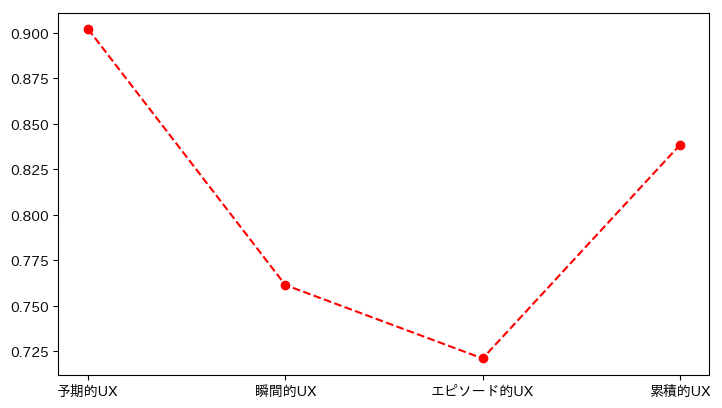

In [41]:

fig = plt.figure(figsize=(8.4, 4.8), dpi=100, facecolor='w', linewidth=0, edgecolor='w')# Figureを設定
#ax = fig.add_subplot(111)# Axesを追加
#ax.set_yticks([0, 0.5, 1])# y軸の目盛設定

#plt.sticks([0, 0.5, 1]) # -1, 0, 1の3つ


x = ["予期的UX", "瞬間的UX", "エピソード的UX", "累積的UX"]
y = [keisan_list[0], keisan_list[2], keisan_list[4], keisan_list[6]]

plt.plot(x, y, marker="o", color = "red", linestyle = "--");